# Практична робота №7

### Студента групи МІТ-31 (підгрупа 1)

### Добровольського Арсенія Михайловича

### Завдання:

1. **Створення власного набору даних для класифікації**:
   - Бінарна класифікація: Створіть набір даних, де кожен запис представляє два числові атрибути та бінарний класовий лейбл (наприклад, "0" або "1"). Ці дані можуть бути синтетичними та містити, наприклад, оцінки студентів та їхній успіх (пройшов/не пройшов).
   - Мультикласова класифікація: Розширте набір даних для включення більше ніж двох класів (наприклад, "низький", "середній", "високий").

2. **Побудова нейронної мережі для класифікації**:
   - Розробіть нейронну мережу з трьома повнозв'язними шарами для класифікації. Використовуйте відповідні функції активації (наприклад, ReLU для прихованих шарів та sigmoid для виходу в бінарній класифікації або softmax для мультикласової).
   - Навчіть модель на вашому власному наборі даних для класифікації (50 епох) та оцініть її ефективність.

3. **Експерименти з покращенням результатів**:
   - Спробуйте побудувати більшу модель, додавши четвертий повнозв'язний шар.
   - Збільште кількість нейронів у кожному шарі.
   - Використовуйте оптимізатор Adam та експериментуйте із зміною його першого параметра (швидкість навчання) з використанням callback.
   - Протестуйте, як змінюється продуктивність моделі при тренуванні протягом 300 епох.

4. **Візуалізація процесу навчання**:
   - Здійсніть візуалізацію зміни функції втрат та точності на тренувальному та тестувальному наборах даних під час тренування моделі.


### Task 1 (data generation)

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# DATASETS GENERATION
np.random.seed(42)
tf.random.set_seed(42)
n_samples = 1000

X = np.random.randn(n_samples, 2)
noise = np.random.randn(n_samples, 2) / 3
X[:, 1] = 0.5 * X[:, 0] + noise[:, 1] # Dependency between X1 and X2, adding noise to X2

# Binary classification
y_bin = (X[:, 1] > X[:, 0]).astype(int) # Forms a binary class label, where 1 if X2 > X1, otherwise 0.

# Multiclass classification
y_multi = np.zeros(n_samples, dtype=int)
y_multi[(X[:, 0] >= -0.3) & (X[:, 1] >= 0)] = 1 # middle
y_multi[(X[:, 0] <= -0.3) & (X[:, 1] <= -0.2)] = 0 # low
y_multi[(X[:, 0] >= 0.4) & (X[:, 1] >= 0.3)] = 2 # high

# Splitting into training and test data
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X, y_multi, test_size=0.2, random_state=42)

# Plot history of model learning
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)
    
    # Model accuracy on training and validation data
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Model loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### Task 2 (neural networks creation & evaluation)

Epoch 1/50
25/25 [==============================] - 2s 16ms/step - loss: 0.6314 - accuracy: 0.8475 - val_loss: 0.5629 - val_accuracy: 0.8500
Epoch 2/50
25/25 [==============================] - 0s 9ms/step - loss: 0.5093 - accuracy: 0.8700 - val_loss: 0.4438 - val_accuracy: 0.8850
Epoch 3/50
25/25 [==============================] - 0s 9ms/step - loss: 0.3856 - accuracy: 0.9013 - val_loss: 0.3252 - val_accuracy: 0.9200
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.2785 - accuracy: 0.9287 - val_loss: 0.2362 - val_accuracy: 0.9550
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2027 - accuracy: 0.9500 - val_loss: 0.1778 - val_accuracy: 0.9750
Epoch 6/50
25/25 [==============================] - 0s 9ms/step - loss: 0.1548 - accuracy: 0.9712 - val_loss: 0.1402 - val_accuracy: 0.9800
Epoch 7/50
25/25 [==============================] - 0s 8ms/step - loss: 0.1216 - accuracy: 0.9725 - val_loss: 0.1155 - val_accuracy: 0.9800
Epoch 8/50
25/25 [=

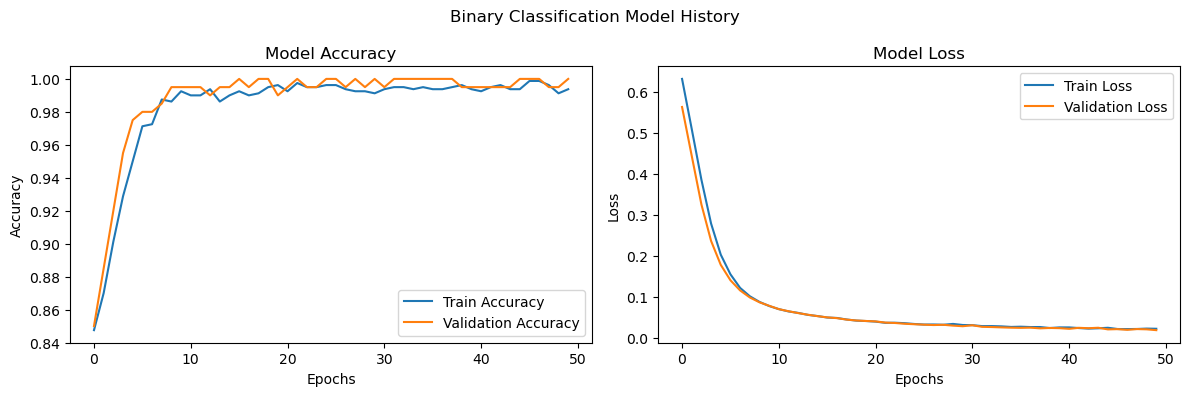

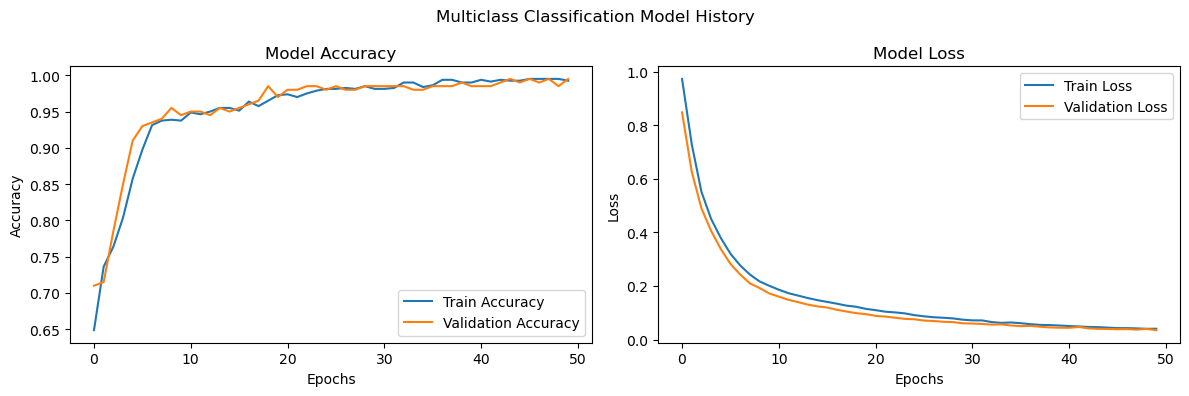

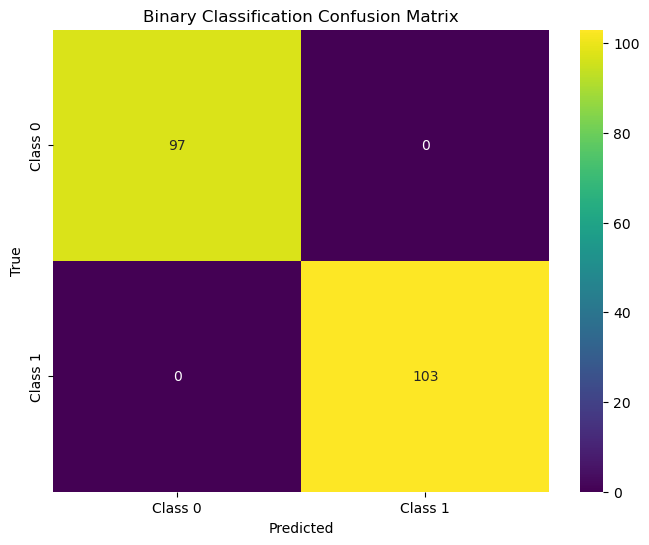

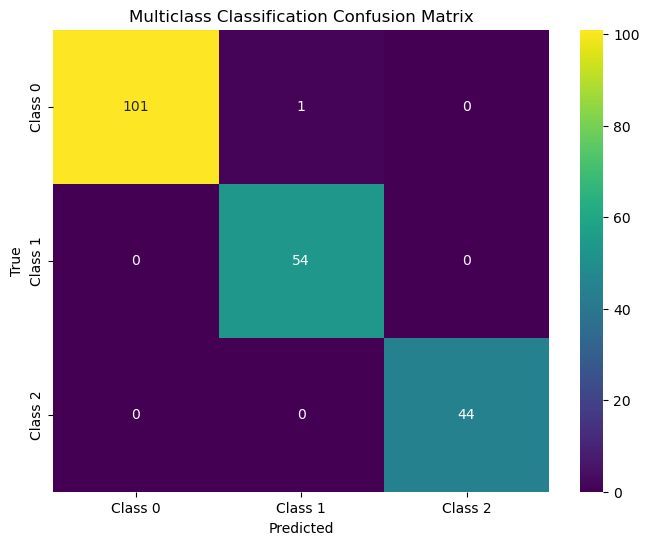

In [41]:
# MODEL CREATION
def create_model(input_dim, output_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(32, activation='relu'),
        Dense(output_dim, activation='softmax' if output_dim > 1 else 'sigmoid')
    ])
    return model

# Binary classification model
bin_model = create_model(input_dim=2, output_dim=1)
bin_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
bin_history = bin_model.fit(X_bin_train, y_bin_train, epochs=50, validation_data=(X_bin_test, y_bin_test))
bin_predictions = (bin_model.predict(X_bin_test) > 0.5).astype(int)

# Multiclass classification model
multi_model = create_model(input_dim=2, output_dim=3)
multi_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
multi_history = multi_model.fit(X_multi_train, y_multi_train, epochs=50, validation_data=(X_multi_test, y_multi_test))
multi_predictions = np.argmax(multi_model.predict(X_multi_test), axis=1)

# Model efficiency evaluation
print("\nBinary classification:")
print("Accuracy:", accuracy_score(y_bin_test, bin_predictions))
print("Classification Report:\n", classification_report(y_bin_test, bin_predictions))

print("\nMulticlass classification:")
print("Accuracy:", accuracy_score(y_multi_test, multi_predictions))
print("Classification Report:\n", classification_report(y_multi_test, multi_predictions))

# Plot history of model training
plot_history(bin_history, "Binary Classification Model History")
plot_history(multi_history, "Multiclass Classification Model History")

# Plot confusion matrices
plot_confusion_matrix(y_bin_test, bin_predictions, labels=['Class 0', 'Class 1'], title = "Binary Classification Confusion Matrix")
plot_confusion_matrix(y_multi_test, multi_predictions, labels=['Class 0', 'Class 1', 'Class 2'], title="Multiclass Classification Confusion Matrix")

### Task 3 (improving neural networks)

Epoch 1/300
25/25 [==============================] - 2s 17ms/step - loss: 0.5469 - accuracy: 0.8363 - val_loss: 0.3983 - val_accuracy: 0.8650 - lr: 0.0010
Epoch 2/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2874 - accuracy: 0.9162 - val_loss: 0.1854 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 3/300
25/25 [==============================] - 0s 6ms/step - loss: 0.1229 - accuracy: 0.9775 - val_loss: 0.0837 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 4/300
25/25 [==============================] - 0s 6ms/step - loss: 0.0678 - accuracy: 0.9875 - val_loss: 0.0564 - val_accuracy: 0.9950 - lr: 0.0010
Epoch 5/300
25/25 [==============================] - 0s 6ms/step - loss: 0.0509 - accuracy: 0.9875 - val_loss: 0.0457 - val_accuracy: 0.9950 - lr: 0.0010
Epoch 6/300
25/25 [==============================] - 0s 6ms/step - loss: 0.0434 - accuracy: 0.9850 - val_loss: 0.0454 - val_accuracy: 0.9850 - lr: 0.0010
Epoch 7/300
25/25 [==============================] - 0s 7ms/step - loss: 0.

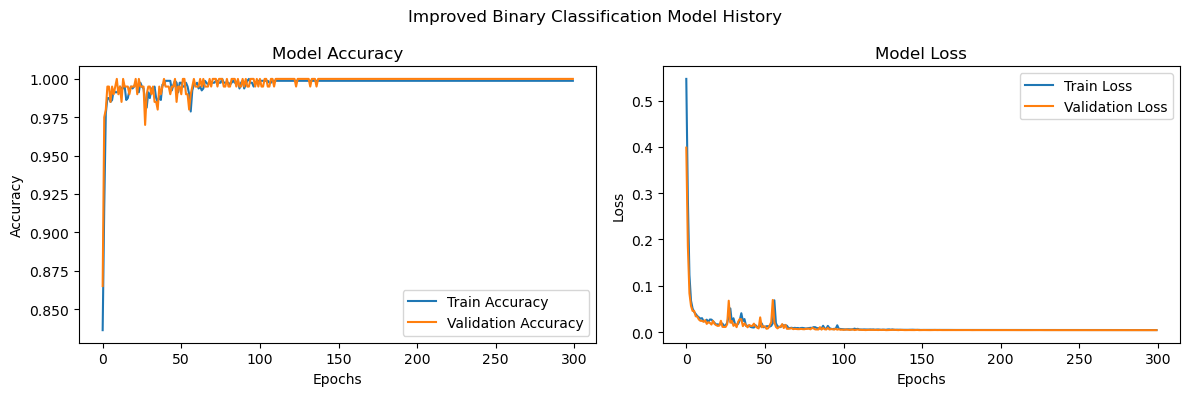

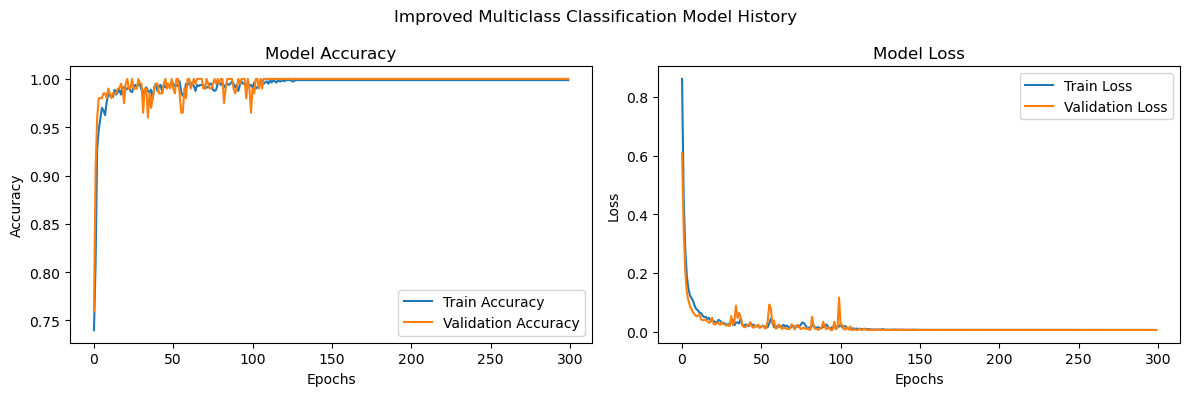

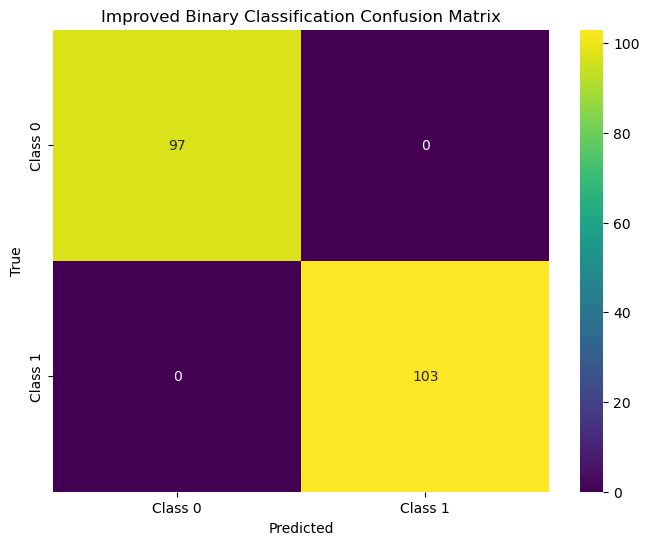

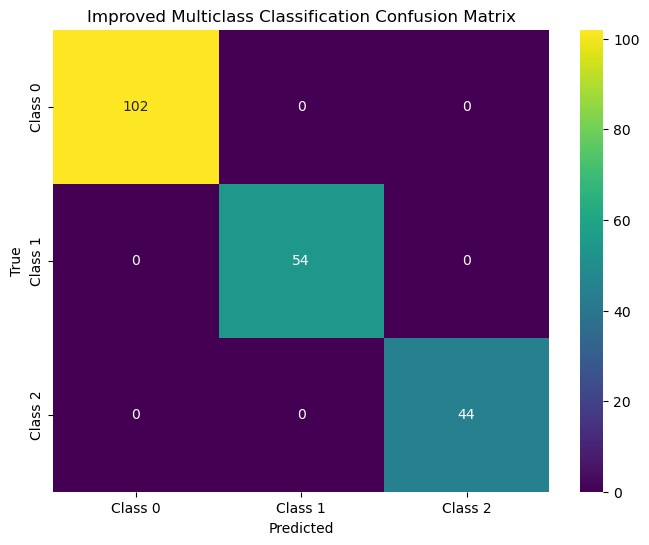

In [43]:
# MODEL CREATION
def create_model(input_dim, output_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(output_dim, activation='softmax' if output_dim > 1 else 'sigmoid')
    ])
    return model

# Learning rate scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-5)

# Binary classification
bin_model_imp = create_model(input_dim=2, output_dim=1)
bin_model_imp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
bin_history_imp = bin_model_imp.fit(X_bin_train, y_bin_train, epochs=300, validation_data=(X_bin_test, y_bin_test), callbacks=[lr_scheduler])
bin_predictions_imp = (bin_model_imp.predict(X_bin_test) > 0.5).astype(int)

# Multiclass classification
multi_model_imp = create_model(input_dim=2, output_dim=3)
multi_model_imp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
multi_history_imp = multi_model_imp.fit(X_multi_train, y_multi_train, epochs=300, validation_data=(X_multi_test, y_multi_test), callbacks=[lr_scheduler])
multi_predictions_imp = np.argmax(multi_model_imp.predict(X_multi_test), axis=1)

# Model efficiency evaluation
print("\nBinary Classification:")
print("Accuracy:", accuracy_score(y_bin_test, bin_predictions_imp))
print("Classification Report:\n", classification_report(y_bin_test, bin_predictions_imp))

print("\nMulticlass Classification:")
print("Accuracy:", accuracy_score(y_multi_test, multi_predictions_imp))
print("Classification Report:\n", classification_report(y_multi_test, multi_predictions_imp))

# Plot history of model learning
plot_history(bin_history_imp, "Improved Binary Classification Model History")
plot_history(multi_history_imp, "Improved Multiclass Classification Model History")

# Plot confusion matrix
plot_confusion_matrix(y_bin_test, bin_predictions_imp, labels=['Class 0', 'Class 1'], title="Improved Binary Classification Confusion Matrix")
plot_confusion_matrix(y_multi_test, multi_predictions_imp, labels=['Class 0', 'Class 1', 'Class 2'], title="Improved Multiclass Classification Confusion Matrix")
